# Clustering

Son técnicas de Machine Learning no Supervisado en los que no tenemos un target y en los que queremos agrupar los datos para encontrar patrones. Es decir, de forma automática encuentra agrupaciones o clústeres de elementos de acuerdo a una medida de similitud entre ellos. 

El objetivo fundamental de las técnicas de clustering consiste en identificar grupos o clústeres de elementos tal que:

- La similitud media entre elementos del mismo clúster sea alta. Similitud intra-clúster alta.

- La similitud media entre elementos de distintos clústeres sea baja. Similitud inter-clúster baja.





In [6]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

# Carga de datos

In [28]:
X=pd.read_csv('/Users/galovalle/Desktop/DP3/train_performance.csv')
X2=pd.read_csv('/Users/galovalle/Desktop/processed.csv')

In [18]:
X = X.drop(['customerid','approveddate', 'creationdate','good_bad_flag','referredby','systemloanid'], axis=1)


In [22]:
X.dropna()

,loannumber,loanamount,totaldue,termdays
0,12,30000.0,34500.0,30
1,2,15000.0,17250.0,30
2,7,20000.0,22250.0,15
3,3,10000.0,11500.0,15
4,9,40000.0,44000.0,30
...,...,...,...,...
4363,2,10000.0,13000.0,30
4364,2,10000.0,13000.0,30
4365,3,10000.0,11500.0,15
4366,2,10000.0,13000.0,30


In [30]:
X2.columns

Index(['Unnamed: 0', 'customerid', 'bank_branch_clients', 'systemloanid',
       'loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'referred', 'realage', 'TipoInteresAhora', 'bank_account_Current',
       'bank_account_Other', 'bank_account_Savings',
       'level_of_education_clients_Graduate',
       'level_of_education_clients_Post-Graduate',
       'level_of_education_clients_Primary',
       'level_of_education_clients_Secondary',
       'level_of_education_clients_Unknown', 'bank_name_client_Access Bank',
       'bank_name_client_Diamond Bank', 'bank_name_client_EcoBank',
       'bank_name_client_FCMB', 'bank_name_client_Fidelity Bank',
       'bank_name_client_First Bank', 'bank_name_client_GT Bank',
       'bank_name_client_Heritage Bank', 'bank_name_client_Keystone Bank',
       'bank_name_client_Skye Bank', 'bank_name_client_Stanbic IBTC',
       'bank_name_client_Standard Chartered', 'bank_name_client_Sterling Bank',
       'bank_name_client_UBA', '

In [34]:
X2=X2.drop(['Unnamed: 0','customerid','good_bad_flag'], axis=1)

In [32]:
X2=X2.dropna()

# Algoritmo k-means

In [46]:
# [3] Definir modelo
kmeans = KMeans(n_clusters=3)

# [4] Entrenar modelo
kmeans.fit(X2)

# [5] Generar predicciones
y_kmeans = kmeans.predict(X2)
y_kmeans

array([2, 2, 2, ..., 0, 0, 2], dtype=int32)

In [50]:
y_kmeans = pd.DataFrame(y_kmeans)

In [53]:
y_kmeans.value_counts()/len(y_kmeans)

2    0.640587
0    0.231051
1    0.128362
dtype: float64

# Visualización de resultados

## Elegir número óptimo de clústers

Elegir el número correcto de grupos
Muchas veces los datos con los que trabajará tendrán múltiples dimensiones, lo que dificultará la visualización. Como consecuencia, el número óptimo de grupos ya no es obvio. Afortunadamente, tenemos una forma de determinar esto matemáticamente.
Mostramos en una gráfico la relación entre el número de clusters y la Suma de cuadrados dentro del grupo (WCSS), luego seleccionamos el número de grupos donde el cambio en WCSS comienza a nivelarse (elbow method).

## Método elbow

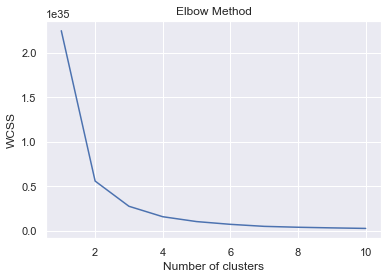

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

El número óptimo parece que sería 3-4 en este caso.